In [52]:
import yfinance as yf

In [53]:
sp500 = yf.Ticker("^GSPC")

In [54]:
sp500 = sp500.history(period = 'max')

In [55]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,0,0
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,0,0
2022-05-20,3927.760010,3943.419922,3810.320068,3901.360107,4278520000,0,0


In [56]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', name='Date', length=18217, freq=None)

<AxesSubplot:xlabel='Date'>

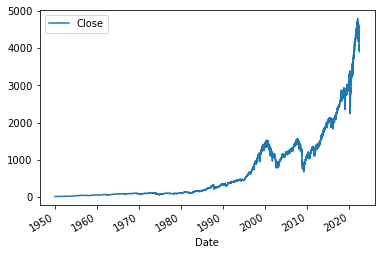

In [57]:
sp500.plot.line(y = 'Close', use_index = True)

In [58]:
del sp500["Dividends"]
del sp500["Stock Splits"]

#### SETTING UP TARGET VARIBALE OFR MACHINE LEARNING

In [59]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [60]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,3900.790039
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,3901.360107
2022-05-20,3927.760010,3943.419922,3810.320068,3901.360107,4278520000,3973.750000


In [61]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [62]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000,1
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000,1
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000,1
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000,1
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001,0


In [63]:
sp500 = sp500.loc["1990-01-01":].copy()

In [64]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


##### TRAINING INITIAL MACHINE LEARNING MODEL

In [65]:
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors  = ['Close', "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [66]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [67]:
import pandas as pd
preds = pd.Series(preds, index = test.index)

In [68]:
precision_score(test["Target"], preds)

0.43209876543209874

In [69]:
combined  = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

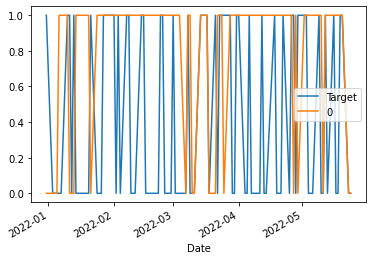

In [70]:
combined.plot()

#### BUILDING A BACKTESTING SYSTEM

In [71]:
def predict(train, test, prediction, models):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis =1)
    return combined

In [72]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions= []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:1].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [73]:
predictions = backtest(sp500, model, predictors)

In [74]:
predictions["Predictions"].value_counts()

0    5663
Name: Predictions, dtype: int64